<a href="https://colab.research.google.com/github/Onedory/yolov5-art-analyze/blob/main/%EC%83%89%EC%83%81%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 기본 설정

구글 코랩에서 필요한 라이브러리를 설치하고 설정합니다.

In [ ]:
# 필요한 라이브러리 설치
!pip install opencv-python-headless numpy matplotlib

# 라이브러리 임포트
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# 2. RGB 이미지를 HSV로 변환하고 색상 히스토그램 계산

-1. 이미지 읽기 및 RGB에서 HSV로 변환

In [ ]:
import os
from google.colab import drive

# 구글 드라이브 강제 마운트
drive.mount('/content/drive', force_remount=True)


def rgb_to_hsv(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    # BGR에서 RGB로 변환 (OpenCV는 기본적으로 BGR로 읽습니다)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # RGB에서 HSV로 변환
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    return image_hsv

# 예시 이미지 경로 (추후 설정)
image_path = '/content/drive/MyDrive/Data/예시사진.jpg'
image_hsv = rgb_to_hsv(image_path)


Mounted at /content/drive


-2. 색상 히스토그램 계산:
HSV 이미지에서 색상(Hue) 값만 추출하여 히스토그램을 계산합니다.

In [ ]:
def calculate_hue_histogram(image_hsv, bins=180):
    # Hue 채널 추출
    hue_channel = image_hsv[:, :, 0]
    # 히스토그램 계산
    histogram, bin_edges = np.histogram(hue_channel, bins=bins, range=(0, 180))
    return histogram, bin_edges

histogram, bin_edges = calculate_hue_histogram(image_hsv)


-3. 히스토그램 시각화


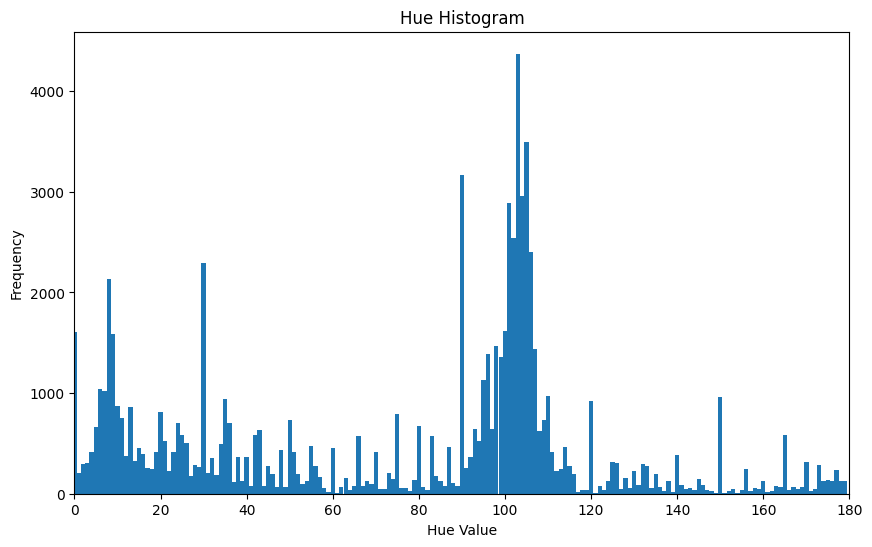

In [ ]:
def plot_histogram(histogram, bin_edges):
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], histogram, width=1)
    plt.xlim(0, 180)
    plt.title('Hue Histogram')
    plt.xlabel('Hue Value')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(histogram, bin_edges)


# 3. 색상 히스토그램 클러스터링

-1 .클러스터링을 위한 데이터 준비

In [ ]:
def prepare_histogram_for_clustering(histogram, bin_edges):
    # 히스토그램을 데이터 포인트로 변환
    data = []
    for bin_edge, count in zip(bin_edges[:-1], histogram):
        data.extend([bin_edge] * count)
    return np.array(data).reshape(-1, 1)

data = prepare_histogram_for_clustering(histogram, bin_edges)


-2 K-means 클러스터링 수행

In [ ]:
def cluster_histogram(data, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.cluster_centers_

# 클러스터 개수 설정 (예: 2개)
n_clusters = 2
cluster_centers = cluster_histogram(data, n_clusters)
print("Cluster Centers (Hue Values):", cluster_centers)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (Hue Values): [[ 23.58530295]
 [106.65314727]]


# 4. 심리 상태 분석

-1.추출된 주요 색상 기반 심리 상태 분석:
클러스터 중심(색상 값)에 따라 심리 상태를 분석합니다.

In [ ]:
def analyze_psychology(cluster_centers):
    # 심리 상태 매핑 (예시)
    psychology_map = {
        (0, 30): "열정적이고 에너지 넘치는 상태",
        (30, 60): "행복하고 창의적인 상태",
        (60, 90): "안정적이고 신뢰감 있는 상태",
        (90, 120): "차분하고 냉철한 상태",
        (120, 150): "내성적이고 수줍은 상태",
        (150, 180): "신비롭고 창의적인 상태"
    }

    analysis = []
    for center in cluster_centers:
        hue_value = int(center[0])
        for hue_range, state in psychology_map.items():
            if hue_range[0] <= hue_value < hue_range[1]:
                analysis.append((hue_value, state))
                break
    return analysis

psychology_analysis = analyze_psychology(cluster_centers)
for hue, state in psychology_analysis:
    print(f"Hue Value: {hue}, Psychological State: {state}")


Hue Value: 23, Psychological State: 열정적이고 에너지 넘치는 상태
Hue Value: 106, Psychological State: 차분하고 냉철한 상태


In [ ]:
# 필요한 라이브러리 설치
!pip install opencv-python-headless numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 이미지 읽기 및 RGB에서 HSV로 변환
def rgb_to_hsv(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    return image_rgb, image_hsv

# 색상 히스토그램 계산
def calculate_hue_histogram(image_hsv, bins=180):
    hue_channel = image_hsv[:, :, 0]
    histogram, bin_edges = np.histogram(hue_channel, bins=bins, range=(0, 180))
    return histogram, bin_edges

# 히스토그램 시각화 함수
def plot_histogram(histogram, bin_edges):
    plt.figure(figsize=(10, 4))
    plt.bar(bin_edges[:-1], histogram, width=1, color='gray')
    plt.xlim(0, 180)
    plt.title('Hue Histogram')
    plt.xlabel('Hue Value')
    plt.ylabel('Frequency')
    plt.show()

# 클러스터링을 위한 데이터 준비
def prepare_histogram_for_clustering(histogram, bin_edges):
    data = []
    for bin_edge, count in zip(bin_edges[:-1], histogram):
        data.extend([bin_edge] * count)
    return np.array(data).reshape(-1, 1)

# K-Means 클러스터링 수행
def cluster_histogram(data, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.cluster_centers_

# 심리 상태 분석
def analyze_psychology(cluster_centers):
    color_map = {
        (0, 30): ("Red", "열정적이고 에너지 넘치는 상태"),
        (30, 60): ("Yellow", "행복하고 창의적인 상태"),
        (60, 90): ("Green", "안정적이고 신뢰감 있는 상태"),
        (90, 120): ("Cyan", "차분하고 냉철한 상태"),
        (120, 150): ("Blue", "내성적이고 수줍은 상태"),
        (150, 180): ("Magenta", "신비롭고 창의적인 상태")
    }

    clinical_implications = {
        "Red": "경계심, 열등감, 공격성",
        "Yellow": "방어 반응, 애정 욕구, 퇴행",
        "Green": "허약, 피로, 자제력 결핍, 복종",
        "Cyan": "깨끗이하려는 욕구, 성장 욕구, 억제하며 추종",
        "Blue": "허약, 피로, 자제력 결핍, 복종",
        "Magenta": "힘을 나타내고 싶은 욕구, 우울한 기분, 질병"
    }

    combination_psychology = {
        ("Red", "Blue"): "부모의 높은 요구 수준을 압력으로 느낍니다.",
        ("Red", "Yellow"): "개심, 공포감, 부모의 히스테리에 대한 번민, 애정 불만을 나타냅니다.",
        ("Red", "Green"): "열등감이 강하고 어머니에 대한 불만이 있습니다.",
        ("Orange", "Yellow"): "동정을 구하거나 성숙하고자 하는 욕구가 강하거나 애정에 대한 갈망을 나타냅니다.",
        ("Cyan", "Brown"): "소변 가리기에 문제가 있습니다.",
        ("Orange", "Blue"): "지능이 낮고 우둔한 어린이는 자기 몸의 불결함을 의미합니다."
    }

    analysis = []
    primary_colors = []
    unique_colors = set()
    for center in cluster_centers:
        hue_value = int(center[0])
        for hue_range, (color, state) in color_map.items():
            if hue_range[0] <= hue_value < hue_range[1] and color not in unique_colors:
                unique_colors.add(color)
                primary_colors.append(color)
                analysis.append((hue_value, color, state, clinical_implications[color]))
                break

    # 주조색 조합 분석
    if len(primary_colors) == 2:
        color_combination = tuple(sorted(primary_colors))
        if color_combination in combination_psychology:
            combination_state = combination_psychology[color_combination]
            analysis.append(("Combination", color_combination, combination_state))

    return analysis

# 텍스트 결과 출력
def print_results(cluster_centers, psychology_analysis):
    print("Cluster Centers (Hue Values):")
    for center in cluster_centers:
        print(f" - {int(center[0])}")

    print("\nPsychological Analysis Results:")
    for result in psychology_analysis:
        if result[0] == "Combination":
            print(f"Color Combination: {result[1]}, State: {result[2]}")
        else:
            hue, color, state, implication = result
            print(f"Hue Value: {hue} ({color}), State: {state}, Clinical Implication: {implication}")


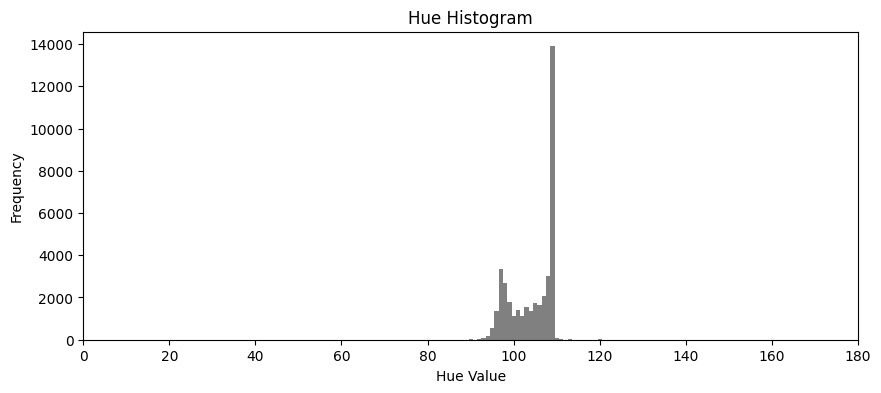

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (Hue Values):
 - 98
 - 107

Psychological Analysis Results:
Hue Value: 98 (Cyan), State: 차분하고 냉철한 상태, Clinical Implication: 깨끗이하려는 욕구, 성장 욕구, 억제하며 추종


In [ ]:
# 이미지 경로 설정 (본인의 이미지 경로로 변경)
image_path = '/content/drive/MyDrive/Data/하늘.jpeg'

# 함수 호출 및 이미지 분석
image_rgb, image_hsv = rgb_to_hsv(image_path)
histogram, bin_edges = calculate_hue_histogram(image_hsv)
plot_histogram(histogram, bin_edges)

data = prepare_histogram_for_clustering(histogram, bin_edges)
n_clusters = 2
cluster_centers = cluster_histogram(data, n_clusters)

psychology_analysis = analyze_psychology(cluster_centers)
print_results(cluster_centers, psychology_analysis)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

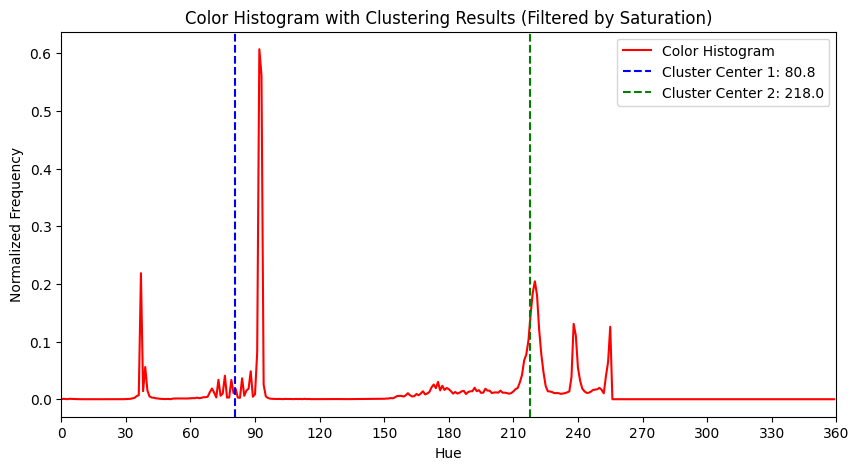

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class ColorAnalyzer:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        if self.image is None:
            raise FileNotFoundError(f"Image file not found at {image_path}")
        self.hsv_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        self.mask = self.create_mask()

    def create_mask(self):
        # Create a mask to exclude low saturation and low brightness areas
        lower_mask = cv2.inRange(self.hsv_image, np.array([0, 50, 50]), np.array([180, 255, 255]))
        return lower_mask

    def extract_color_histogram(self):
        hist = cv2.calcHist([self.hsv_image], [0], self.mask, [180], [0, 180])
        hist = cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX).flatten()
        return hist

    def plot_histogram(self, hist):
        # Create a colorful histogram as shown in the example
        fig, ax = plt.subplots(figsize=(12, 4))
        for i in range(180):
            color = np.zeros((1, 1, 3), np.uint8)
            color[0, 0, 0] = i
            color = cv2.cvtColor(color, cv2.COLOR_HSV2RGB).flatten()
            ax.bar(i, hist[i], color=color / 255, edgecolor=color / 255, width=1)
        ax.set_xlim([0, 180])
        ax.set_title('Hue Histogram')
        ax.set_xlabel('Bins')
        ax.set_ylabel('Frequency')
        plt.show()

    def cluster_histogram(self, hist, n_clusters=2):
        pixels = np.arange(180).reshape(-1, 1)
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(pixels, sample_weight=hist)
        centers = kmeans.cluster_centers_
        return centers

    def classify_color(self, hue):
        thresholds = {
            '빨강': (0, 15),
            '갈색': (15, 40),
            '주황': (40, 60),
            '노랑': (60, 90),
            '연두': (90, 125),
            '녹색': (125, 150),
            '청록': (150, 175),
            '하늘': (175, 200),
            '파랑': (200, 225),
            '남색': (225, 250),
            '남보라': (250, 275),
            '보라': (275, 300),
            '분홍': (300, 325),
            '자주': (325, 345),
            '빨강': (345, 360)
        }

        for color, (low, high) in thresholds.items():
            if low <= hue <= high:
                return color
        return 'unknown'

    def get_dominant_colors(self):
        hist = self.extract_color_histogram()
        self.plot_histogram(hist)
        centers = self.cluster_histogram(hist)

        # Determine primary and secondary colors based on histogram peaks
        sorted_indices = np.argsort(hist[centers.astype(int).flatten()])[::-1]
        primary_color_center = centers[sorted_indices[0]]
        secondary_color_center = centers[sorted_indices[1]]

        primary_color = self.classify_color(primary_color_center[0])
        secondary_color = self.classify_color(secondary_color_center[0])

        return primary_color, secondary_color

    def print_clinical_implications(self, primary_color, secondary_color):
        implications = {
            '빨강': '열등감(66.7), 공격성(55.3), 압압감해소(53.6), 분노(51.4)',
            '갈색': '힘을 나타내고 싶은욕구(65.0), 우인관계내보내, 질병(33.6)',
            '주황': '동정적, 애호구립(75.2), 성취하고 싶은 욕구(65.0), 행동보다 상상의 치중(43.8)',
            '노랑': '방어적 반응(32.9), 애정욕구(54.0), 질병(45.3)',
            '연두': '희망',
            '녹색': '희망, 피로(66.4), 자제력결핍(48.2), 불쾌(44.5)',
            '청록': '희망',
            '하늘': '희망',
            '파랑': '깨끗하려는 욕구(81.8), 성장욕구(77.4), 예지하려는 욕구(63.5)',
            '남색': '희망',
            '남보라': '희망',
            '보라': '희망',
            '분홍': '휴식',
            '자주': '휴식',
            'unknown': '정보 없음'
        }

        print("임상적 의미와 당위성 확률:")
        print(f"Primary color ({primary_color}): {implications.get(primary_color, '정보 없음')}")
        print(f"Secondary color ({secondary_color}): {implications.get(secondary_color, '정보 없음')}")

    def print_psychological_traits(self, primary_color):
        traits = {
            '빨강': '자유롭게 느낀대로 행동하고 반응하는 유아들이 많고, 신체 기능이 왕성한 편입니다.',
            '갈색': '개인적인 위생과 청결에 대한 어른들의 요구에 대한 반항을 의미합니다.',
            '주황': '사교적인 색으로 주위에 잘 적응하는 사회적 성격의 유아들이 많습니다.',
            '노랑': '소심하고 어른들에게 의존적인 행동을 하는 경우가 많습니다.',
            '연두': '희망을 상징합니다.',
            '녹색': '균형을 상징으로 감정을 강하게 표현하지 않고, 충동적인 감정을 통제하는 내성적인 유아들이 많습니다.',
            '청록': '희망을 상징합니다.',
            '하늘': '희망을 상징합니다.',
            '파랑': '불안이나 공포심을 품고 있는 경우가 많으며, 주로 억제된 불안을 나타냅니다.',
            '남색': '희망을 상징합니다.',
            '남보라': '희망을 상징합니다.',
            '보라': '억제된 불안한 심리 상태와 관련이 깊고 친구를 많이 사귀기를 싫어할 수 있습니다.',
            '분홍': '일반적으로 기온이나 체온의 변화에 민감한 반응을 보입니다.',
            '자주': '일반적으로 기온이나 체온의 변화에 민감한 반응을 보입니다.',
            'unknown': '정보 없음'
        }

        print("단일 색채의 심리:")
        print(f"{primary_color}: {traits.get(primary_color, '정보 없음')}")

# Load the image
image_path = 'a.JPG'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the thresholds for low saturation
low_saturation_threshold = 0.2

# Create a mask to exclude low saturation values
saturation_mask = hsv_image[:, :, 1] > (low_saturation_threshold * 255)

# Apply the mask to the HSV image
filtered_hsv = hsv_image[saturation_mask]

# Calculate the color histogram for the filtered image
hist = cv2.calcHist([filtered_hsv], [0], None, [360], [0, 360])

# Normalize the histogram
normalized_hist = cv2.normalize(hist, hist).flatten()

# Apply KMeans clustering to the histogram
kmeans = KMeans(n_clusters=2)
kmeans.fit(np.array(list(range(360))).reshape(-1, 1), sample_weight=normalized_hist)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Sort the centers
cluster_centers.sort(axis=0)

# Plot the color histogram with clustering results
plt.figure(figsize=(10, 5))
plt.title("Color Histogram with Clustering Results (Filtered by Saturation)")
plt.xlabel("Hue")
plt.ylabel("Normalized Frequency")
plt.plot(normalized_hist, color='r', label='Color Histogram')
plt.axvline(x=cluster_centers[0], color='b', linestyle='--', label=f'Cluster Center 1: {cluster_centers[0][0]:.1f}')
plt.axvline(x=cluster_centers[1], color='g', linestyle='--', label=f'Cluster Center 2: {cluster_centers[1][0]:.1f}')
plt.xlim([0, 360])
plt.xticks(np.arange(0, 361, 30))  # Set x-axis ticks to 30-degree increments
plt.legend()
plt


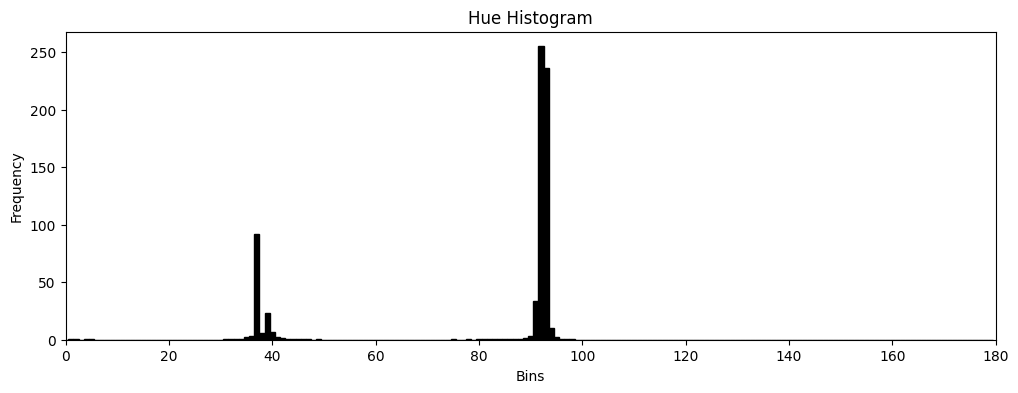

Primary Color: 연두
Secondary Color: 갈색
임상적 의미와 당위성 확률:
Primary color (연두): 희망
Secondary color (갈색): 힘을 나타내고 싶은욕구(65.0), 우인관계내보내, 질병(33.6)
단일 색채의 심리:
연두: 희망을 상징합니다.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class ColorAnalyzer:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        if self.image is None:
            raise FileNotFoundError(f"Image file not found at {image_path}")
        self.hsv_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        self.mask = self.create_mask()

    def create_mask(self):
        # Create a mask to exclude low saturation and low brightness areas
        lower_mask = cv2.inRange(self.hsv_image, np.array([0, 50, 50]), np.array([180, 255, 255]))
        return lower_mask

    def extract_color_histogram(self):
        hist = cv2.calcHist([self.hsv_image], [0], self.mask, [180], [0, 180])
        hist = cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX).flatten()
        return hist

    def plot_histogram(self, hist):
        # Create a colorful histogram as shown in the example
        fig, ax = plt.subplots(figsize=(12, 4))
        for i in range(180):
            color = np.zeros((1, 1, 3), np.uint8)
            color[0, 0, 0] = i
            color = cv2.cvtColor(color, cv2.COLOR_HSV2RGB).flatten()
            ax.bar(i, hist[i], color=color / 255, edgecolor=color / 255, width=1)
        ax.set_xlim([0, 180])
        ax.set_title('Hue Histogram')
        ax.set_xlabel('Bins')
        ax.set_ylabel('Frequency')
        plt.show()

    def cluster_histogram(self, hist, n_clusters=2):
        pixels = np.arange(180).reshape(-1, 1)
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(pixels, sample_weight=hist)
        centers = kmeans.cluster_centers_
        return centers

    def classify_color(self, hue):
        thresholds = {
            '빨강': (0, 15),
            '갈색': (15, 40),
            '주황': (40, 60),
            '노랑': (60, 90),
            '연두': (90, 125),
            '녹색': (125, 150),
            '청록': (150, 175),
            '하늘': (175, 200),
            '파랑': (200, 225),
            '남색': (225, 250),
            '남보라': (250, 275),
            '보라': (275, 300),
            '분홍': (300, 325),
            '자주': (325, 345),
            '빨강': (345, 360),
        }

        for color, (low, high) in thresholds.items():
            if low <= hue <= high:
                return color
        return 'unknown'

    def get_dominant_colors(self):
        hist = self.extract_color_histogram()
        self.plot_histogram(hist)
        centers = self.cluster_histogram(hist)

        # Determine primary and secondary colors based on histogram peaks
        sorted_indices = np.argsort(hist[centers.astype(int).flatten()])[::-1]
        primary_color_center = centers[sorted_indices[0]]
        secondary_color_center = centers[sorted_indices[1]]

        primary_color = self.classify_color(primary_color_center[0])
        secondary_color = self.classify_color(secondary_color_center[0])

        return primary_color, secondary_color

    def print_clinical_implications(self, primary_color, secondary_color):
        implications = {
            '빨강': '열등감(66.7), 공격성(55.3), 압압감해소(53.6), 분노(51.4)',
            '갈색': '힘을 나타내고 싶은욕구(65.0), 우인관계내보내, 질병(33.6)',
            '주황': '동정적, 애호구립(75.2), 성취하고 싶은 욕구(65.0), 행동보다 상상의 치중(43.8)',
            '노랑': '방어적 반응(32.9), 애정욕구(54.0), 질병(45.3)',
            '연두': '희망',
            '녹색': '희망, 피로(66.4), 자제력결핍(48.2), 불쾌(44.5)',
            '청록': '희망',
            '하늘': '희망',
            '파랑': '깨끗하려는 욕구(81.8), 성장욕구(77.4), 예지하려는 욕구(63.5)',
            '남색': '희망',
            '남보라': '희망',
            '보라': '희망',
            '분홍': '휴식',
            '자주': '휴식',
            'unknown': '정보 없음'
        }

        print("임상적 의미와 당위성 확률:")
        print(f"Primary color ({primary_color}): {implications.get(primary_color, '정보 없음')}")
        print(f"Secondary color ({secondary_color}): {implications.get(secondary_color, '정보 없음')}")

    def print_psychological_traits(self, primary_color):
        traits = {
            '빨강': '자유롭게 느낀대로 행동하고 반응하는 유아들이 많고, 신체 기능이 왕성한 편입니다.',
            '갈색': '개인적인 위생과 청결에 대한 어른들의 요구에 대한 반항을 의미합니다.',
            '주황': '사교적인 색으로 주위에 잘 적응하는 사회적 성격의 유아들이 많습니다.',
            '노랑': '소심하고 어른들에게 의존적인 행동을 하는 경우가 많습니다.',
            '연두': '희망을 상징합니다.',
            '녹색': '균형을 상징으로 감정을 강하게 표현하지 않고, 충동적인 감정을 통제하는 내성적인 유아들이 많습니다.',
            '청록': '희망을 상징합니다.',
            '하늘': '희망을 상징합니다.',
            '파랑': '불안이나 공포심을 품고 있는 경우가 많으며, 주로 억제된 불안을 나타냅니다.',
            '남색': '희망을 상징합니다.',
            '남보라': '희망을 상징합니다.',
            '보라': '억제된 불안한 심리 상태와 관련이 깊고 친구를 많이 사귀기를 싫어할 수 있습니다.',
            '분홍': '일반적으로 기온이나 체온의 변화에 민감한 반응을 보입니다.',
            '자주': '일반적으로 기온이나 체온의 변화에 민감한 반응을 보입니다.',
            'unknown': '정보 없음'
        }

        print("단일 색채의 심리:")
        print(f"{primary_color}: {traits.get(primary_color, '정보 없음')}")

# Usage example
image_path = 'a.JPG'
analyzer = ColorAnalyzer(image_path)
primary_color, secondary_color = analyzer.get_dominant_colors()
print('Primary Color:', primary_color)
print('Secondary Color:', secondary_color)
analyzer.print_clinical_implications(primary_color, secondary_color)
analyzer.print_psychological_traits(primary_color)

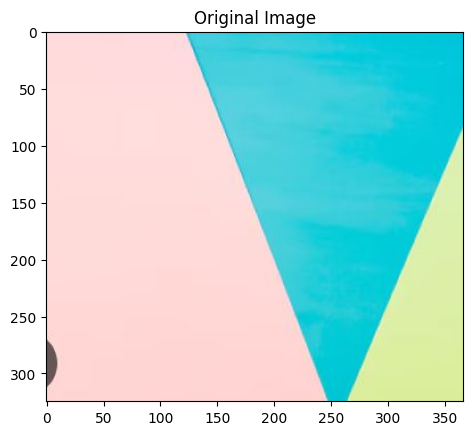

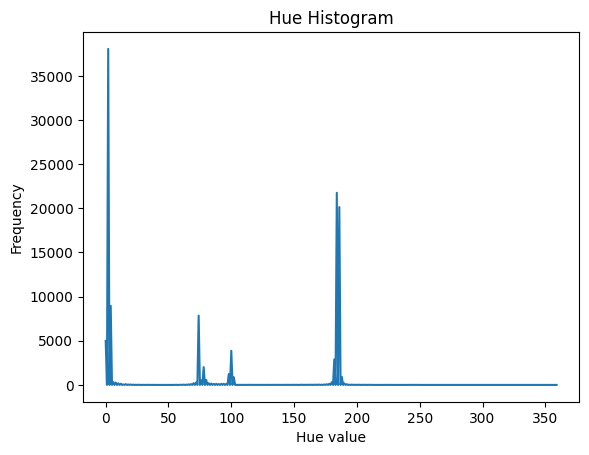

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


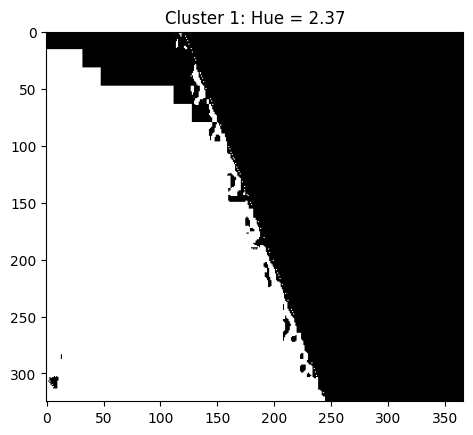

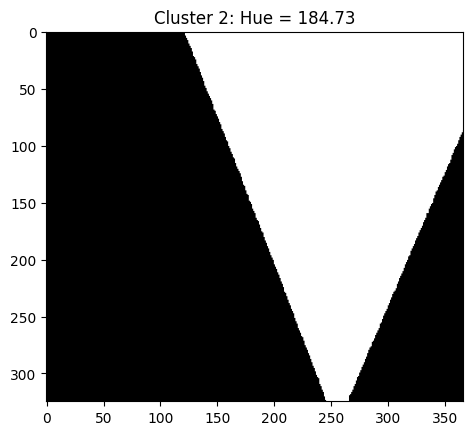

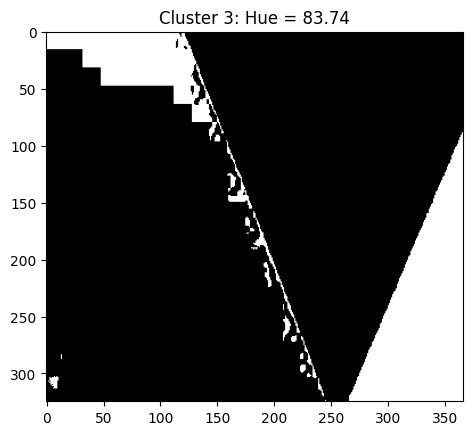

<ipython-input-7-11237cb5ba0f>:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dominant_colors_hsv[i][0][0] = hue // 2  # Hue 값을 다시 0-180 범위로 축소


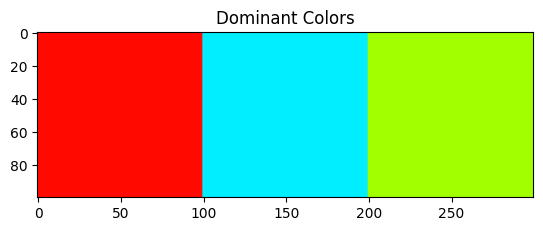

Color: 분홍, Meaning: Love, Kindness


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def load_image(image_path):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title('Original Image')
    plt.show()
    return image

def convert_to_hsv(image):
    # RGB에서 HSV로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image

def calculate_histogram(hue_channel):
    # 히스토그램 계산 (0~360 사이의 값)
    hue_channel = hue_channel * 2  # OpenCV의 Hue 값은 0-180 범위이므로 0-360으로 확장
    hist = cv2.calcHist([hue_channel], [0], None, [360], [0, 360])
    return hist

def perform_clustering(hue_channel, n_clusters=3):
    # Hue 값을 1차원 배열로 변환하여 클러스터링
    hue_values = (hue_channel * 2).reshape(-1, 1)  # Hue 값을 0-360으로 확장
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(hue_values)
    dominant_colors = kmeans.cluster_centers_
    labels = kmeans.labels_.reshape(hue_channel.shape)
    return dominant_colors, labels

def visualize_histogram(hist):
    # 히스토그램 시각화
    plt.plot(hist)
    plt.title('Hue Histogram')
    plt.xlabel('Hue value')
    plt.ylabel('Frequency')
    plt.show()

def visualize_clusters(labels, dominant_colors):
    # 클러스터링 결과 시각화
    for i, color in enumerate(dominant_colors):
        mask = labels == i
        plt.imshow(mask, cmap='gray')
        plt.title(f'Cluster {i+1}: Hue = {color[0]:.2f}')
        plt.show()

def create_color_patch(colors):
    patch = np.zeros((100, 100*len(colors), 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        patch[:, i*100:(i+1)*100, :] = color
    return patch

def visualize_dominant_colors(dominant_colors):
    # HSV에서 RGB로 변환
    dominant_colors_hsv = np.zeros((len(dominant_colors), 1, 3), dtype=np.uint8)
    for i, hue in enumerate(dominant_colors):
        dominant_colors_hsv[i][0][0] = hue // 2  # Hue 값을 다시 0-180 범위로 축소
        dominant_colors_hsv[i][0][1] = 255  # Saturation
        dominant_colors_hsv[i][0][2] = 255  # Value

    dominant_colors_rgb = cv2.cvtColor(dominant_colors_hsv, cv2.COLOR_HSV2RGB).reshape(-1, 3)
    color_patch = create_color_patch(dominant_colors_rgb)
    plt.imshow(color_patch)
    plt.title('Dominant Colors')
    plt.show()
    return dominant_colors_rgb

def analyze_color_psychology(dominant_colors_rgb):
    # 색상 심리학 규칙 적용 (예시)
    color_ranges = {
        "빨강": (0, 15),
        '갈색': (15, 40),
        '주황': (40, 60),
        '노랑': (60, 90),
        '연두': (90, 125),
        '녹색': (125, 150),
        '청록': (150, 175),
        '하늘': (175, 200),
        '파랑': (200, 225),
        '남색': (225, 250),
        '남보라': (250, 275),
        '보라': (275, 300),
        '분홍': (300, 325),
        '자주': (325, 345),
        '빨강': (345, 360),
    }

    color_meanings = {
        "빨강": "Energy, Passion",
        "갈색": "Stability, Support",
        "주황": "Creativity, Enthusiasm",
        "노랑": "Happiness, Warmth",
        "연두": "Growth, Freshness",
        "녹색": "Calm, Nature",
        "청록": "Tranquility, Clarity",
        "하늘": "Peace, Serenity",
        "파랑": "Trust, Peace",
        "남색": "Depth, Wisdom",
        "남보라": "Spirituality, Mystery",
        "보라": "Luxury, Creativity",
        "분홍": "Love, Kindness",
        "자주": "Power, Ambition",
    }

    # 색상 심리 분석 결과 출력
    for color in dominant_colors_rgb:
        hue = color[0] * 2  # Hue 값을 다시 0-360 범위로 확장
        for color_name, (lower, upper) in color_ranges.items():
            if lower <= hue < upper:
                meaning = color_meanings[color_name]
                print(f"Color: {color_name}, Meaning: {meaning}")
                break

def main(image_path):
    image = load_image(image_path)
    hsv_image = convert_to_hsv(image)
    hue_channel = hsv_image[:, :, 0]
    hist = calculate_histogram(hue_channel)
    visualize_histogram(hist)
    dominant_colors, labels = perform_clustering(hue_channel)
    visualize_clusters(labels, dominant_colors)
    dominant_colors_rgb = visualize_dominant_colors(dominant_colors)
    analyze_color_psychology(dominant_colors_rgb)

# 실행 예시
image_path = 'a.JPG'  # 분석할 이미지 파일 경로를 설정합니다.
main(image_path)


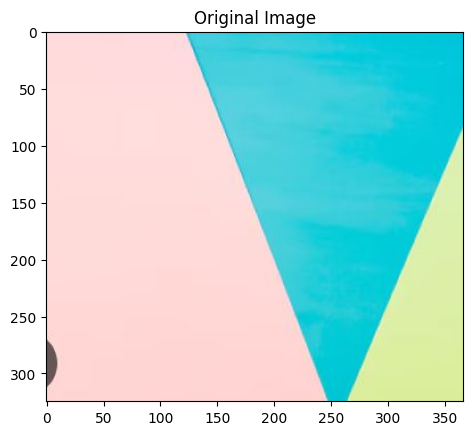

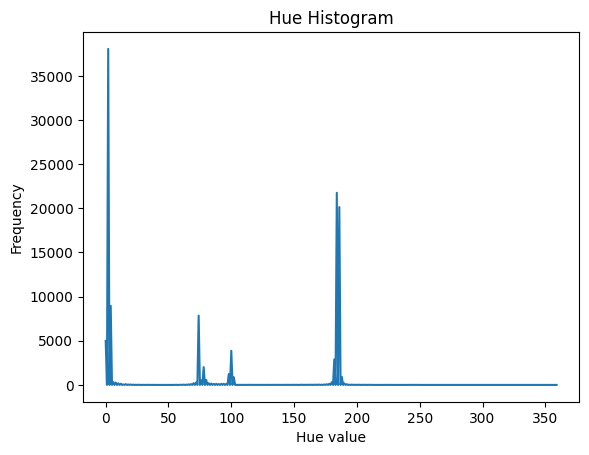

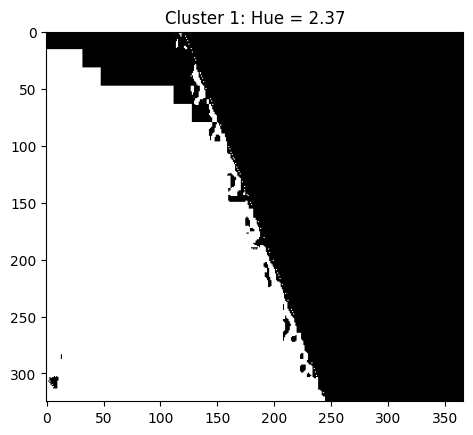

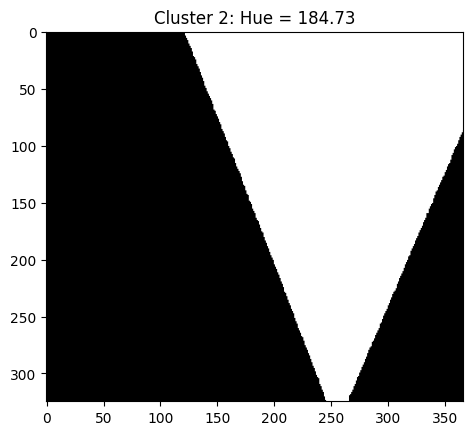

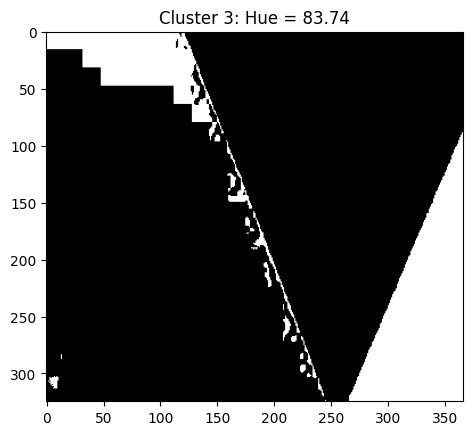

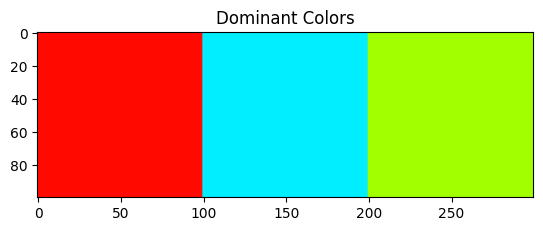

Color: 분홍, Meaning: Love, Kindness
Second Dominant Color (Hue Value): 184.72634325346286
Second Dominant Color (RGB): [  0 238 255]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def load_image(image_path):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at the path: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title('Original Image')
    plt.show()
    return image

def convert_to_hsv(image):
    # RGB에서 HSV로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image

def calculate_histogram(hue_channel):
    # 히스토그램 계산 (0~360 사이의 값)
    hue_channel = hue_channel * 2  # OpenCV의 Hue 값은 0-180 범위이므로 0-360으로 확장
    hist = cv2.calcHist([hue_channel], [0], None, [360], [0, 360])
    return hist

def perform_clustering(hue_channel, n_clusters=3):
    # Hue 값을 1차원 배열로 변환하여 클러스터링
    hue_values = (hue_channel * 2).reshape(-1, 1)  # Hue 값을 0-360으로 확장
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(hue_values)
    dominant_colors = kmeans.cluster_centers_
    labels = kmeans.labels_.reshape(hue_channel.shape)
    return dominant_colors, labels, kmeans

def visualize_histogram(hist):
    # 히스토그램 시각화
    plt.plot(hist)
    plt.title('Hue Histogram')
    plt.xlabel('Hue value')
    plt.ylabel('Frequency')
    plt.show()

def visualize_clusters(labels, dominant_colors):
    # 클러스터링 결과 시각화
    for i, color in enumerate(dominant_colors):
        mask = labels == i
        plt.imshow(mask, cmap='gray')
        plt.title(f'Cluster {i+1}: Hue = {color[0]:.2f}')
        plt.show()

def create_color_patch(colors):
    patch = np.zeros((100, 100*len(colors), 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        patch[:, i*100:(i+1)*100, :] = color
    return patch

def visualize_dominant_colors(dominant_colors):
    # HSV에서 RGB로 변환
    dominant_colors_hsv = np.zeros((len(dominant_colors), 1, 3), dtype=np.uint8)
    for i, hue in enumerate(dominant_colors):
        dominant_colors_hsv[i][0][0] = int(hue[0]) // 2  # Hue 값을 다시 0-180 범위로 축소
        dominant_colors_hsv[i][0][1] = 255  # Saturation
        dominant_colors_hsv[i][0][2] = 255  # Value

    dominant_colors_rgb = cv2.cvtColor(dominant_colors_hsv, cv2.COLOR_HSV2RGB).reshape(-1, 3)
    color_patch = create_color_patch(dominant_colors_rgb)
    plt.imshow(color_patch)
    plt.title('Dominant Colors')
    plt.show()
    return dominant_colors_rgb

def analyze_color_psychology(dominant_colors_rgb):
    # 색상 심리학 규칙 적용 (예시)
    color_ranges = {
        "빨강": (0, 15),
        '갈색': (15, 40),
        '주황': (40, 60),
        '노랑': (60, 90),
        '연두': (90, 125),
        '녹색': (125, 150),
        '청록': (150, 175),
        '하늘': (175, 200),
        '파랑': (200, 225),
        '남색': (225, 250),
        '남보라': (250, 275),
        '보라': (275, 300),
        '분홍': (300, 325),
        '자주': (325, 345),
        '빨강': (345, 360),
    }

    color_meanings = {
        "빨강": "Energy, Passion",
        "갈색": "Stability, Support",
        "주황": "Creativity, Enthusiasm",
        "노랑": "Happiness, Warmth",
        "연두": "Growth, Freshness",
        "녹색": "Calm, Nature",
        "청록": "Tranquility, Clarity",
        "하늘": "Peace, Serenity",
        "파랑": "Trust, Peace",
        "남색": "Depth, Wisdom",
        "남보라": "Spirituality, Mystery",
        "보라": "Luxury, Creativity",
        "분홍": "Love, Kindness",
        "자주": "Power, Ambition",
    }

    # 색상 심리 분석 결과 출력
    for color in dominant_colors_rgb:
        hue = int(color[0]) * 2  # Hue 값을 다시 0-360 범위로 확장
        for color_name, (lower, upper) in color_ranges.items():
            if lower <= hue < upper:
                meaning = color_meanings[color_name]
                print(f"Color: {color_name}, Meaning: {meaning}")
                break

def main(image_path):
    image = load_image(image_path)
    hsv_image = convert_to_hsv(image)
    hue_channel = hsv_image[:, :, 0]
    hist = calculate_histogram(hue_channel)
    visualize_histogram(hist)
    dominant_colors, labels, kmeans = perform_clustering(hue_channel)
    visualize_clusters(labels, dominant_colors)
    dominant_colors_rgb = visualize_dominant_colors(dominant_colors)
    analyze_color_psychology(dominant_colors_rgb)

    # 두 번째로 우세한 색상 추출
    second_dominant_color = extract_second_dominant_color(kmeans, hue_channel)
    print("Second Dominant Color (Hue Value):", second_dominant_color)
    second_dominant_color_rgb = convert_hue_to_rgb(second_dominant_color)
    print("Second Dominant Color (RGB):", second_dominant_color_rgb)

def extract_second_dominant_color(kmeans, hue_channel):
    labels, counts = np.unique(kmeans.labels_, return_counts=True)
    sorted_labels = labels[np.argsort(counts)][::-1]  # 내림차순 정렬
    second_dominant_label = sorted_labels[1]  # 두 번째로 많은 클러스터의 레이블
    second_dominant_color = kmeans.cluster_centers_[second_dominant_label][0]
    return second_dominant_color

def convert_hue_to_rgb(hue):
    # HSV에서 RGB로 변환
    hsv_color = np.uint8([[[int(hue) // 2, 255, 255]]])  # Hue 값을 다시 0-180 범위로 축소
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)
    return rgb_color[0][0]

# 실행 예시
image_path = 'a.JPG'  # 분석할 이미지 파일 경로를 설정합니다.
main(image_path)


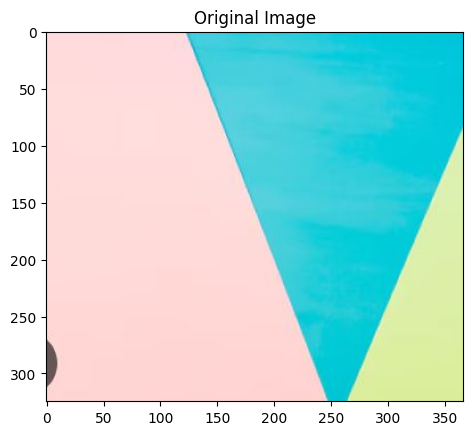

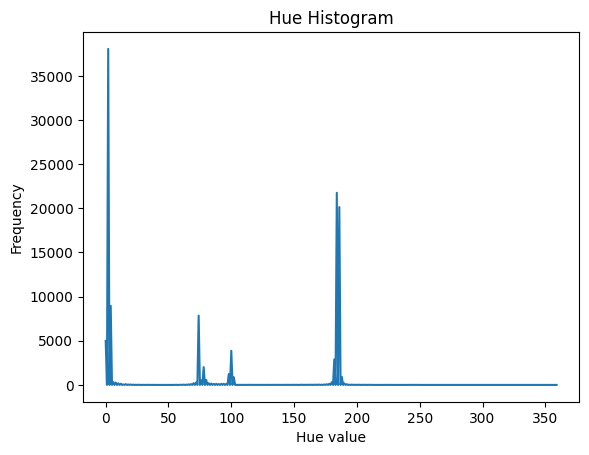

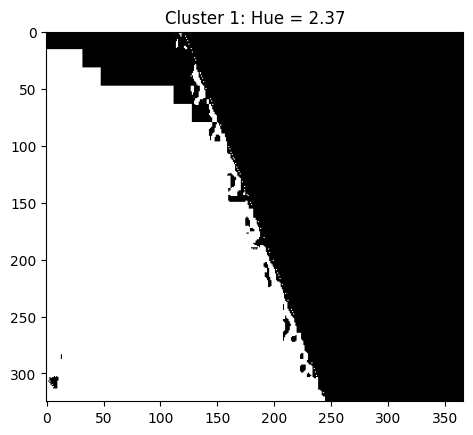

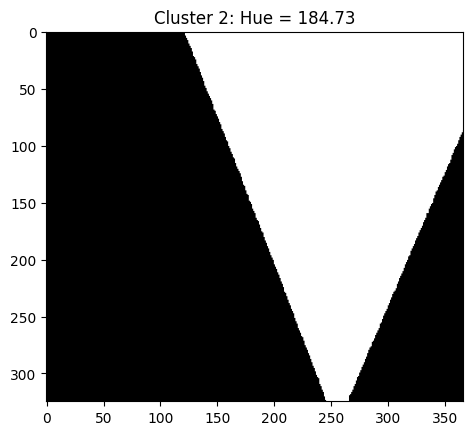

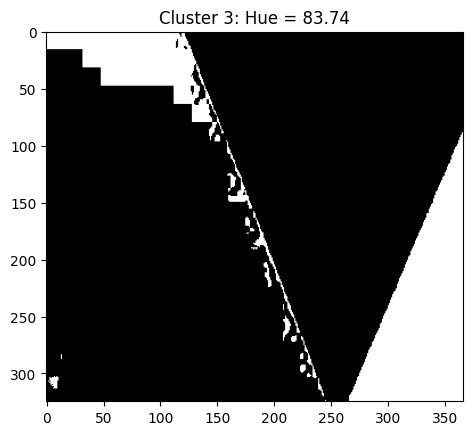

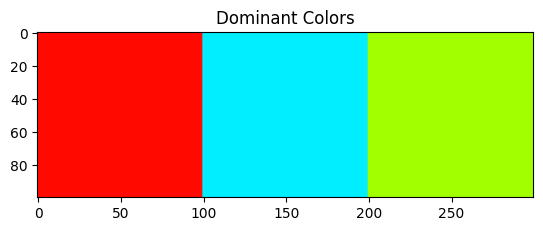

Color: 분홍, Meaning: Love, Kindness
Second Dominant Color: 하늘, Meaning: Peace, Serenity


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def load_image(image_path):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at the path: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title('Original Image')
    plt.show()
    return image

def convert_to_hsv(image):
    # RGB에서 HSV로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image

def calculate_histogram(hue_channel):
    # 히스토그램 계산 (0~360 사이의 값)
    hue_channel = hue_channel * 2  # OpenCV의 Hue 값은 0-180 범위이므로 0-360으로 확장
    hist = cv2.calcHist([hue_channel], [0], None, [360], [0, 360])
    return hist

def perform_clustering(hue_channel, n_clusters=3):
    # Hue 값을 1차원 배열로 변환하여 클러스터링
    hue_values = (hue_channel * 2).reshape(-1, 1)  # Hue 값을 0-360으로 확장
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(hue_values)
    dominant_colors = kmeans.cluster_centers_
    labels = kmeans.labels_.reshape(hue_channel.shape)
    return dominant_colors, labels, kmeans

def visualize_histogram(hist):
    # 히스토그램 시각화
    plt.plot(hist)
    plt.title('Hue Histogram')
    plt.xlabel('Hue value')
    plt.ylabel('Frequency')
    plt.show()

def visualize_clusters(labels, dominant_colors):
    # 클러스터링 결과 시각화
    for i, color in enumerate(dominant_colors):
        mask = labels == i
        plt.imshow(mask, cmap='gray')
        plt.title(f'Cluster {i+1}: Hue = {color[0]:.2f}')
        plt.show()

def create_color_patch(colors):
    patch = np.zeros((100, 100*len(colors), 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        patch[:, i*100:(i+1)*100, :] = color
    return patch

def visualize_dominant_colors(dominant_colors):
    # HSV에서 RGB로 변환
    dominant_colors_hsv = np.zeros((len(dominant_colors), 1, 3), dtype=np.uint8)
    for i, hue in enumerate(dominant_colors):
        dominant_colors_hsv[i][0][0] = int(hue[0]) // 2  # Hue 값을 다시 0-180 범위로 축소
        dominant_colors_hsv[i][0][1] = 255  # Saturation
        dominant_colors_hsv[i][0][2] = 255  # Value

    dominant_colors_rgb = cv2.cvtColor(dominant_colors_hsv, cv2.COLOR_HSV2RGB).reshape(-1, 3)
    color_patch = create_color_patch(dominant_colors_rgb)
    plt.imshow(color_patch)
    plt.title('Dominant Colors')
    plt.show()
    return dominant_colors_rgb

def analyze_color_psychology(dominant_colors_rgb):
    # 색상 심리학 규칙 적용 (예시)
    color_ranges = {
        "빨강": (0, 15),
        '갈색': (15, 40),
        '주황': (40, 60),
        '노랑': (60, 90),
        '연두': (90, 125),
        '녹색': (125, 150),
        '청록': (150, 175),
        '하늘': (175, 200),
        '파랑': (200, 225),
        '남색': (225, 250),
        '남보라': (250, 275),
        '보라': (275, 300),
        '분홍': (300, 325),
        '자주': (325, 345),
        '빨강': (345, 360),
    }

    color_meanings = {
        "빨강": "Energy, Passion",
        "갈색": "Stability, Support",
        "주황": "Creativity, Enthusiasm",
        "노랑": "Happiness, Warmth",
        "연두": "Growth, Freshness",
        "녹색": "Calm, Nature",
        "청록": "Tranquility, Clarity",
        "하늘": "Peace, Serenity",
        "파랑": "Trust, Peace",
        "남색": "Depth, Wisdom",
        "남보라": "Spirituality, Mystery",
        "보라": "Luxury, Creativity",
        "분홍": "Love, Kindness",
        "자주": "Power, Ambition",
    }

    # 색상 심리 분석 결과 출력
    for color in dominant_colors_rgb:
        hue = int(color[0]) * 2  # Hue 값을 다시 0-360 범위로 확장
        for color_name, (lower, upper) in color_ranges.items():
            if lower <= hue < upper:
                meaning = color_meanings[color_name]
                print(f"Color: {color_name}, Meaning: {meaning}")
                break

def main(image_path):
    image = load_image(image_path)
    hsv_image = convert_to_hsv(image)
    hue_channel = hsv_image[:, :, 0]
    hist = calculate_histogram(hue_channel)
    visualize_histogram(hist)
    dominant_colors, labels, kmeans = perform_clustering(hue_channel)
    visualize_clusters(labels, dominant_colors)
    dominant_colors_rgb = visualize_dominant_colors(dominant_colors)
    analyze_color_psychology(dominant_colors_rgb)

    # 두 번째로 우세한 색상 추출
    second_dominant_color = extract_second_dominant_color(kmeans, hue_channel)
    #print("Second Dominant Color (Hue Value):", second_dominant_color)
    second_dominant_color_rgb = convert_hue_to_rgb(second_dominant_color)
    #print("Second Dominant Color (RGB):", second_dominant_color_rgb)

    # 두 번째 우세한 색상 이름과 의미 찾기
    find_color_name_and_meaning(second_dominant_color)

def extract_second_dominant_color(kmeans, hue_channel):
    labels, counts = np.unique(kmeans.labels_, return_counts=True)
    sorted_labels = labels[np.argsort(counts)][::-1]  # 내림차순 정렬
    second_dominant_label = sorted_labels[1]  # 두 번째로 많은 클러스터의 레이블
    second_dominant_color = kmeans.cluster_centers_[second_dominant_label][0]
    return second_dominant_color

def convert_hue_to_rgb(hue):
    # HSV에서 RGB로 변환
    hsv_color = np.uint8([[[int(hue) // 2, 255, 255]]])  # Hue 값을 다시 0-180 범위로 축소
    rgb_color = cv2.cvtColor(hsv_color, cv2.COLOR_HSV2RGB)
    return rgb_color[0][0]

def find_color_name_and_meaning(hue):
    color_ranges = {
        "빨강": (0, 15),
        '갈색': (15, 40),
        '주황': (40, 60),
        '노랑': (60, 90),
        '연두': (90, 125),
        '녹색': (125, 150),
        '청록': (150, 175),
        '하늘': (175, 200),
        '파랑': (200, 225),
        '남색': (225, 250),
        '남보라': (250, 275),
        '보라': (275, 300),
        '분홍': (300, 325),
        '자주': (325, 345),
        '빨강': (345, 360),
    }

    color_meanings = {
        "빨강": "Energy, Passion",
        "갈색": "Stability, Support",
        "주황": "Creativity, Enthusiasm",
        "노랑": "Happiness, Warmth",
        "연두": "Growth, Freshness",
        "녹색": "Calm, Nature",
        "청록": "Tranquility, Clarity",
        "하늘": "Peace, Serenity",
        "파랑": "Trust, Peace",
        "남색": "Depth, Wisdom",
        "남보라": "Spirituality, Mystery",
        "보라": "Luxury, Creativity",
        "분홍": "Love, Kindness",
        "자주": "Power, Ambition",
    }

    hue = int(hue)  # Hue 값을 단일 값으로 변환
    for color_name, (lower, upper) in color_ranges.items():
        if lower <= hue < upper:
            meaning = color_meanings[color_name]
            print(f"Second Dominant Color: {color_name}, Meaning: {meaning}")
            break

# 실행 예시
image_path = 'a.JPG'  # 분석할 이미지 파일 경로를 설정합니다.
main(image_path)
